<a href="https://colab.research.google.com/github/FaragoFa/PDI/blob/main/PDI_Practica2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Faragó Facundo - 114462

# ACTIVIDAD PRACTICA 2

Implementar las siguientes operaciones aritmeticas:

1. Suma y diferencia clampeada en RGB 
2. Suma y diferencia promediada en RGB
3. Suma y diferencia en YIQ
4. If-lighter / If-darker


# Cargar repositorio

In [1]:
! git clone https://github.com/FaragoFa/PDI.git

Cloning into 'PDI'...
remote: Enumerating objects: 22, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 22 (delta 5), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (22/22), done.


# Importar librerias e Imagenes

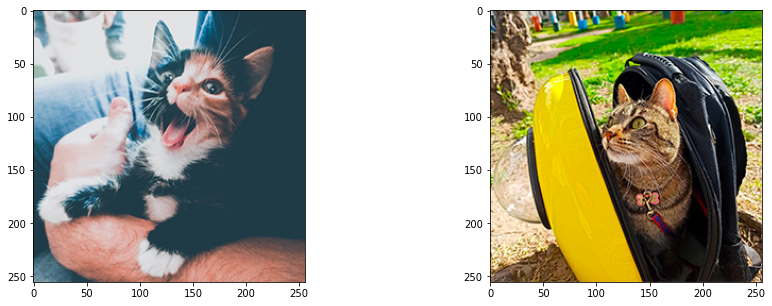

In [2]:
import imageio      #Para leer y guardar imagenes.
import numpy as np  #Operaciones con vectores, matrices, tensores...
import matplotlib.pyplot as plt    #Para realizar graficos.
%matplotlib inline

#Cargo imagenes
img_1 = imageio.imread('/content/PDI/Tizona256.jpg')/255
img_2 = imageio.imread('/content/PDI/Lambda256.jpg')/255

#Mostrar imagenes
fig, axes = plt.subplots(1, 2, figsize=(15,5))
axes[0].imshow(img_1)
axes[1].imshow(img_2)

# Funciónes

## Operaciones con matrices

In [3]:
def apply_matrix(img, M):
        return np.matmul(img.reshape((-1,3)), M.T).reshape(img.shape)

## RGB - YIQ

In [4]:
M_YIQ = np.array([[0.299, 0.587, 0.114],
                  [0.595716, -0.274453, -0.321263],
                  [0.211456, -0.522591, 0.311135]])

M_RGB = np.array([[1, 0.9563, 0.6210],
                  [1, -0.2721, -0.6474],
                  [1, -1.1070, 1.7046]])

def apply_matrix(img, M):
    return np.matmul(img.reshape((-1,3)), M.T).reshape(img.shape)

def rgb2yiq(img):
    return apply_matrix(img, M_YIQ)

def yiq2rgb(img):
    return apply_matrix(img, M_RGB)

## IF-LIGHTER / IF-DARKER

In [5]:
def if_lighter(img_1, img_2):
    img_1_y = rgb2yiq(img_1)[:,:,0]
    img_2_y = rgb2yiq(img_2)[:,:,0]
    img_3 = np.zeros(img_1.shape)
  
    mask = img_1_y > img_2_y
    img_3[mask] = img_1[mask]
    
    mask = img_2_y >= img_1_y
    img_3[mask] = img_2[mask]
    
    return img_3

def if_darker(img_1, img_2):
    img_1_y = rgb2yiq(img_1)[:,:,0]
    img_2_y = rgb2yiq(img_2)[:,:,0]
    img_3 = np.zeros(img_1.shape)
    
    mask = img_1_y < img_2_y
    img_3[mask] = img_1[mask]
    
    mask = img_2_y <= img_1_y
    img_3[mask] = img_2[mask]
    
    return img_3

# Aritmetica de Pixel


## SUMA Y DIFERENCIA CLAMPEADA (RGB)

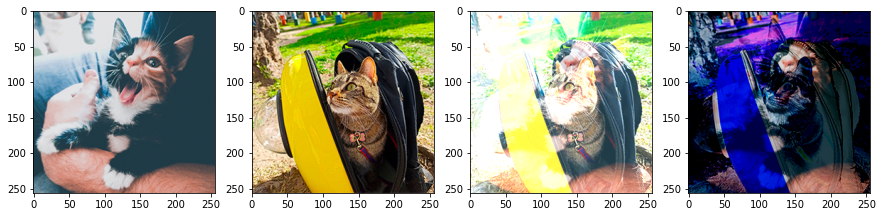

In [6]:
img_3 = img_1 + img_2
img_3 = np.clip(img_3, 0 , 1)
img_4 = img_1 - img_2
img_4 = np.clip(img_4, 0 , 1)

fig, axes = plt.subplots(1, 4, figsize=(15,5))
axes[0].imshow(img_1)
axes[1].imshow(img_2)
axes[2].imshow(img_3)
axes[3].imshow(img_4)

## SUMA Y DIFERENCIA PROMEDIADA (RGB)

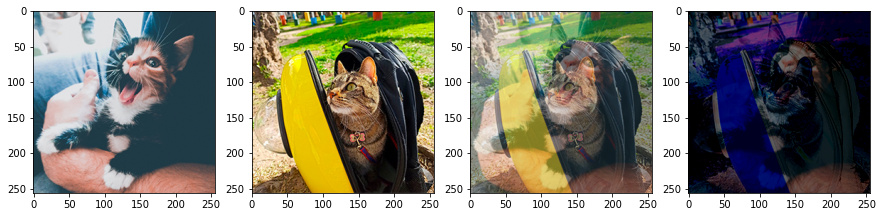

In [7]:
img_3 = (img_1 + img_2)/2
img_3 = np.clip(img_3, 0 , 1)
img_4 = (img_1 - img_2)/2
img_4 = np.clip(img_4, 0 , 1)

fig, axes = plt.subplots(1, 4, figsize=(15,5))
axes[0].imshow(img_1)
axes[1].imshow(img_2)
axes[2].imshow(img_3)
axes[3].imshow(img_4)

## SUMA Y DIFERENCIA (YIQ)

Como la cromaticidad no es un valor escalar, sumar es incorrecto en el espacio YIQ. Por lo tanto, voy a sumar el canal Y y utilizar la interpolacion en los canales IQ

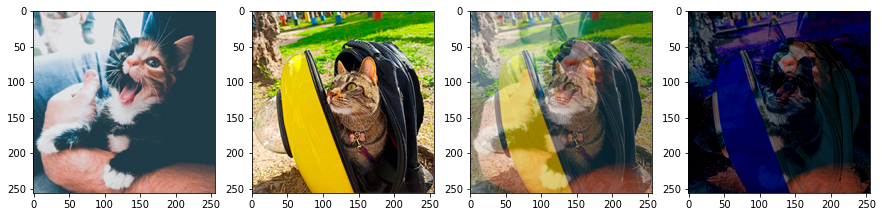

In [8]:
img_1_yiq = rgb2yiq(img_1)
img_1_y = img_1_yiq[:,:,0]
img_1_i = img_1_yiq[:,:,1]
img_1_q = img_1_yiq[:,:,2]

img_2_yiq = rgb2yiq(img_2)
img_2_y = img_2_yiq[:,:,0]
img_2_i = img_2_yiq[:,:,1]
img_2_q = img_2_yiq[:,:,2]

#########################################
#Suma promediada
img_3_yiq_y = (img_1_y + img_2_y)/2

#Suma Interpolada
img_3_yiq_i = (img_1_y * img_1_i + img_2_y * img_2_i) / (img_1_y + img_2_y)
img_3_yiq_q = (img_1_y * img_1_q + img_2_y * img_2_q) / (img_1_y + img_2_y)

img_3_yiq = rgb2yiq(img_2) #No entiendo porque si no pongo esta linea me dice que "img_3_yiq" no esta definida si la estoy definiendo en la sig linea
img_3_yiq[:,:,0] = img_3_yiq_y
img_3_yiq[:,:,1] = img_3_yiq_i
img_3_yiq[:,:,2] = img_3_yiq_q
#########################################


#########################################
#Resta promediada
img_4_yiq_y = (img_1_y - img_2_y)/2

#Resta Interpolada
img_4_yiq_i = (img_1_y * img_1_i - img_2_y * img_2_i) / (img_1_y + img_2_y)
img_4_yiq_q = (img_1_y * img_1_q - img_2_y * img_2_q) / (img_1_y + img_2_y)

img_4_yiq = rgb2yiq(img_1) #No entiendo porque si no pongo esta linea me dice que "img_4_yiq" no esta definida si la estoy definiendo en la sig linea
img_4_yiq[:,:,0] = img_4_yiq_y
img_4_yiq[:,:,1] = img_4_yiq_i
img_4_yiq[:,:,2] = img_4_yiq_q
#########################################

img_3_rgb = yiq2rgb(img_3_yiq)
img_4_rgb = yiq2rgb(img_4_yiq)

fig, axes = plt.subplots(1, 4, figsize=(15,5))
axes[0].imshow(img_1)
axes[1].imshow(img_2)
axes[2].imshow(np.clip(img_3_rgb,0,1))
axes[3].imshow(np.clip(img_4_rgb,0,1))


## IF-LIGHTER / IF-DARKER

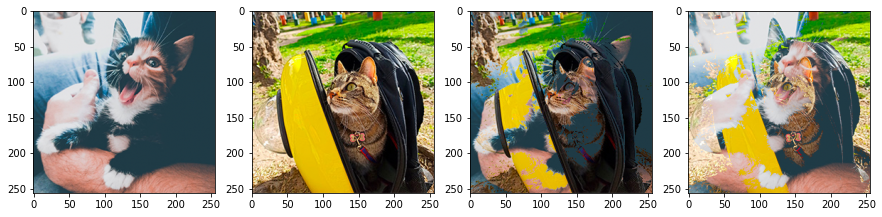

In [9]:
img_3 = if_darker(img_1,img_2)
img_4 = if_lighter(img_1,img_2)

fig, axes = plt.subplots(1, 4, figsize=(15,5))
axes[0].imshow(img_1)
axes[1].imshow(img_2)
axes[2].imshow(img_3)
axes[3].imshow(img_4)